In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

# 创建调色板 
`color_palette()`：可以生成各种颜色，并且可以被任何有`palette`参数的函数使用
- 可以接受任何seaborn或matplotlib颜色表中的颜色名称（除了jet），也可以接受任何有效的matplotlib形式的颜色列表（RGB元组，hex颜色代码，HTML颜色名称）
- 返回一个由RGB元组组成的列表，无参数调用则返回当前默认颜色的列表
- `set_palette()`接受与`color_palette()`一样的参数，并对所有绘图的默认色环进行设置
- 可以在`with`语句中使用`color_palette()`临时改变默认颜色

有三种通用的color palette可以使用，它们分别是：qualitative，sequential，diverging。

## 1.分类色板（qualitative）
`qualitative`调色板适用于**分类数据**的显示，如**不连续且内在没有顺序关系的数据**。

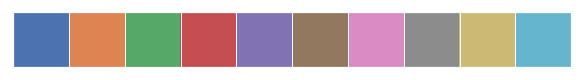

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

有6种不同的默认主题，它们分别是：deep，muted，pastel，birght，dark，colorblind。

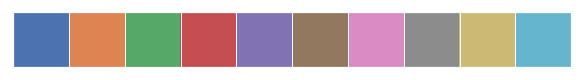

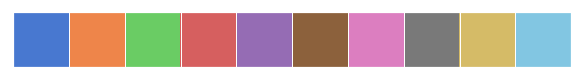

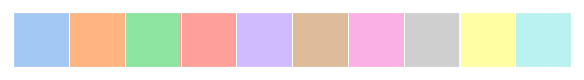

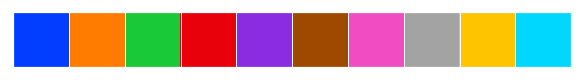

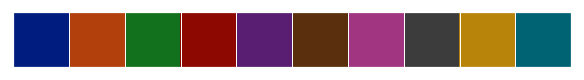

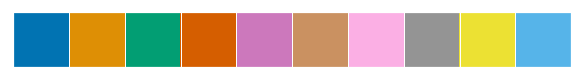

In [4]:
themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
for theme in themes:
    current_palette = sns.color_palette(theme)
    sns.palplot(current_palette)

### 1.1 使用色圈系统（hls色空间）
默认主题中的颜色类型有限，若有更多类型数据需要区分时，可以使用`hls`色空间。
- 调用`color_palette()`方法，并指定使用`hls`，及所需的分类颜色数量
- 调用`hls_palette()`方法，并指定颜色数量，并可以使用`l`和`s`参数分别控制亮度和饱和度

为了获得亮度和饱和度更加均匀的颜色分布，可以使用`huls`来获取颜色，或使用`huls_palette()`方法

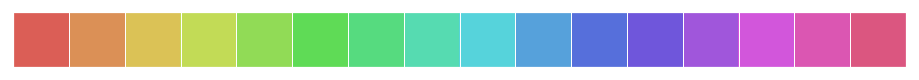

In [5]:
sns.palplot(sns.color_palette("hls", 16))

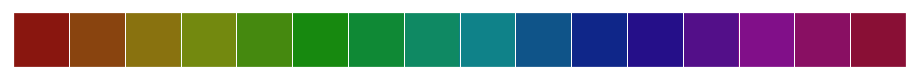

In [6]:
sns.palplot(sns.hls_palette(16, l=.3, s=.8))  # 设置亮度和饱和度

### 1.2 使用分类Color Brewer调色
`Color Brewer`是一个调色工具，使用`choose_colorbrewer_palette()`来调用该工具，并代入三种通用的color palette（qualitative，sequential，diverging），浏览并调节颜色参数，并返回调整后的RGB元组。

In [7]:
sns.choose_colorbrewer_palette("qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

### 1.3 使用xkcd颜色来命名颜色
`xkcd_rgb`字典包含了954个被命名的颜色（ http://xkcd.com/color/rgb ），可直接使用颜色名进行调用。  
若要一次性抽取多种颜色，可以将颜色名组成列表，并代入`xkcd_palette()`中。

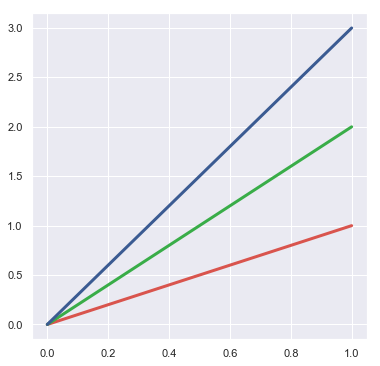

In [8]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

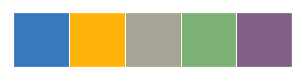

In [9]:
# 一次性抽取多种颜色
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

## 2. 连续色板（sequential）
`sequential`连续色板使用色调上有相对细微变化，且在亮度和饱和度上有较大变化的一组颜色。适用于**有从低（无意义）到高（有意义）范围过度的数据**，比如`kdeplot()`或者`corrplot()`。

`Color Brewer`字典中有一组很好的调色板，以主导颜色命名，如`Blues`、`BuGn`等，颜色以从浅到深排列：
- 若要翻转深浅顺序，可在颜色的命名后添加`_r`后缀
- 若要创建没有动态范围的`dark`面板（暗处理颜色)，可在颜色的命名后添加`_d`后缀

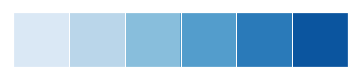

In [10]:
sns.palplot(sns.color_palette("Blues")) # 以蓝色为主导颜色的连续色板

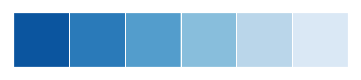

In [11]:
sns.palplot(sns.color_palette("Blues_r")) # 翻转深浅顺序

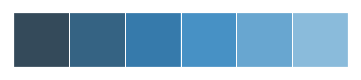

In [12]:
sns.palplot(sns.color_palette("Blues_d")) # 使用没有动态范围的暗处理颜色

### 2.1 cubehelix连续调色板
`cubehelix`调色板系统在亮度和色变变化上具有线性上升或下降的特点
- `color_palette()`：色轮周围旋转获取颜色
- `cubehelix_palette()`：默认不在色轮周围旋转
    - `start`参数（0~3）获取色彩
    - `rot`获取旋转范围（-1~1）
    - `reverse=True`翻转色彩顺序
    - `dark`、`light`亮度调整
    - `as_cmap=True`不返回颜色列表，而返回cmap对象

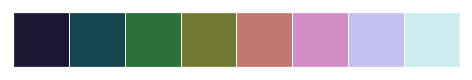

In [13]:
sns.palplot(sns.color_palette("cubehelix",8))

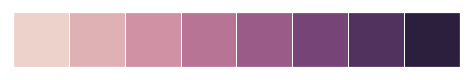

In [14]:
sns.palplot(sns.cubehelix_palette(8))

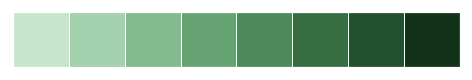

In [15]:
sns.palplot(sns.cubehelix_palette(8,start=2,rot=0))

### 2.2 定制的连续调色板
`light_palette()`和`dark_palette()`，都是单一颜色，并且能产生从亮值或者暗去饱和的值到这个颜色的调色板  
任何有效的matplotlib颜色可以作为输入。另外辅助的解释可以由input参数来控制。目前你可以在hls或husl空间中提供默认的rgb元组，您还可以使用任何有效的xkcd颜色的种子。

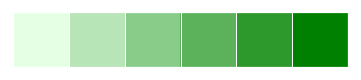

In [16]:
sns.palplot(sns.light_palette("green"))

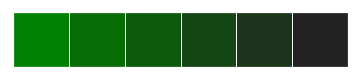

In [17]:
sns.palplot(sns.dark_palette("green", reverse=True))

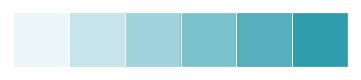

In [18]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

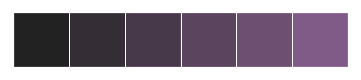

In [19]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

对于定制连续色板也同样有`choose_light_palette` 和 `choose_dark_palette` 两个函数来交互式的调节创建调色板

In [20]:
sns.choose_light_palette()

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[array([0.94054458, 0.95945542, 0.95679586, 1.        ]),
 array([0.87363254, 0.90742758, 0.90267475, 1.        ]),
 array([0.80672051, 0.85539974, 0.84855364, 1.        ]),
 array([0.73741876, 0.80151376, 0.79249963, 1.        ]),
 array([0.67050672, 0.74948591, 0.73837852, 1.        ]),
 array([0.60120497, 0.69559993, 0.68232452, 1.        ]),
 array([0.53429294, 0.64357209, 0.62820341, 1.        ]),
 array([0.46499119, 0.58968611, 0.5721494 , 1.        ]),
 array([0.39807915, 0.53765827, 0.51802829, 1.        ]),
 array([0.33116712, 0.48563043, 0.46390718, 1.        ])]

## 3.离散色板（diverging）
`diverging`离散色板，**适用于数据特征含有大的低值和大的高值，数据中通常有一个意义明确的中点**。  
特点：中点使用低强度颜色，两端使用不同的起始颜色，且两端颜色的亮度和饱和度相同  
`Color Brewer`颜色字典里也同时拥有一套精心挑选的离散颜色映射（两端不同颜色）:

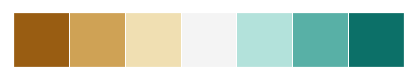

In [21]:
sns.palplot(sns.color_palette("BrBG", 7))

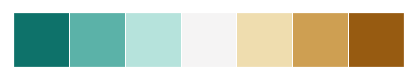

In [22]:
sns.palplot(sns.color_palette("BrBG_r", 7))

### 3.1 定制的离散调色板
`diverging_palette()`为离散的数据创建一个定制的颜色映射（当然也有一个类似配套的互动工具：`choose_diverging_palette()`）。  
该函数使用husl颜色系统的离散色板。你需要传递两种色调，并可选择性的设定明度和饱和度的端点。函数将使用husl的端点值及由此产生的中间值进行均衡。

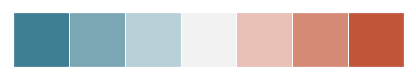

In [23]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

In [24]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[array([0.25199714, 0.49873371, 0.57516028, 1.        ]),
 array([0.43026136, 0.62000665, 0.67878019, 1.        ]),
 array([0.60852558, 0.74127959, 0.7824001 , 1.        ]),
 array([0.7867898 , 0.86255253, 0.88602001, 1.        ]),
 array([0.95, 0.95, 0.95, 1.  ]),
 array([0.95457726, 0.76653099, 0.78032569, 1.        ]),
 array([0.91971827, 0.58735877, 0.61174   , 1.        ]),
 array([0.88485928, 0.40818655, 0.44315432, 1.        ]),
 array([0.85104086, 0.23436275, 0.27960104, 1.        ])]

## 4.设置默认的调色板
`color_palette()` 函数拥有一个名为 `set_palette()` 的配套使用函数。 `set_palette()` 接受与 `color_palette()` 相同的参数，但是它会更改默认的 matplotlib 参数，以便成为所有的调色板配置。

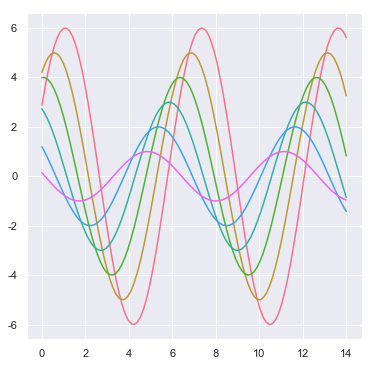

In [25]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sns.set_palette("husl")
sinplot()

color_palette()函数也可以在一个with块中使用，以达到临时更改调色板的目的。

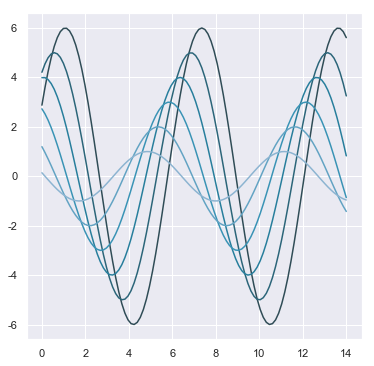

In [26]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

# 总结
- 本篇介绍了seaborn中的颜色调控方法，提到的一个重要函数是：`color_palette()`。针对不同的数据类型有三种调色方式：

    - 分类色板（qualitative）

    - 连续色板（sequential）

    - 离散色板（diverging）

- 其中还提到了 `Color Brewer` 工具，它可以很好的应用在以上三种调色方式上。

- 记住还有一个很有用的函数 `choose_xxx_paletee()`，用于交互式的调试颜色。

- 还可以通过 `set_palette()` 函数设置绘图默认参数。

